# Student Academic Outcome Prediction

This notebook implements supervised learning techniques to predict student academic outcomes (Graduate, Dropout, or Enrolled) based on various student attributes. We'll explore the data, preprocess it, build different models, evaluate their performance, and interpret the results.

## 1. Import Required Libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_palette('deep')
%matplotlib inline

## 2. Data Loading and Exploration

Let's load the student dataset and explore its structure to understand the data we're working with.

Dataset loaded successfully!

First 5 rows of the dataset:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate



Dataset shape: (76518, 38)

Missing values:


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


Basic statistics:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000



Target variable distribution:


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target
Graduate    47.42
Dropout     33.06
Enrolled    19.52
Name: count, dtype: float64

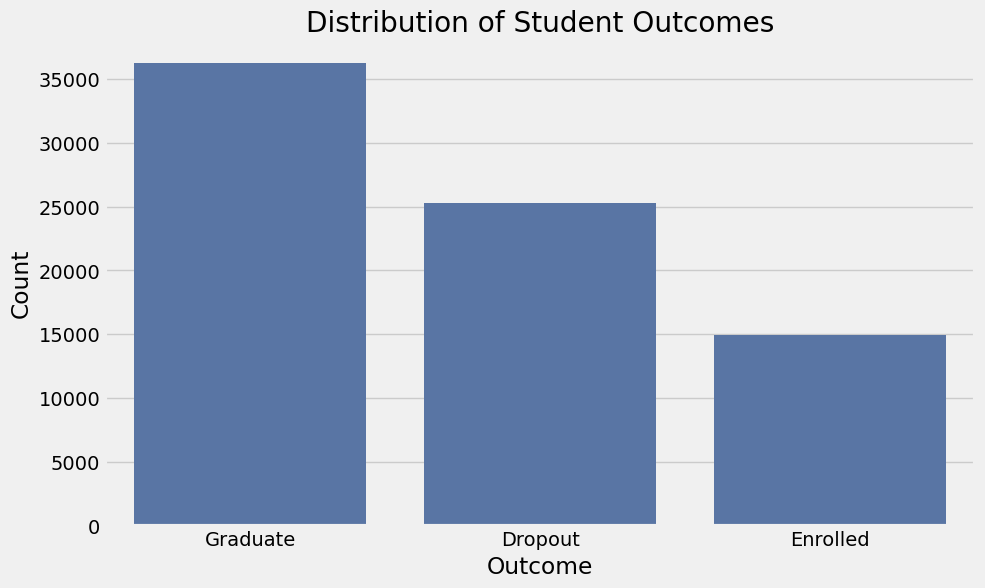

In [ ]:

try:
    data = pd.read_csv("../data/train.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Please ensure the file path is correct.")
    print("Creating sample data for demonstration purposes...")
    np.random.seed(42)
    n = 1000
    
    # Generate sample data
    data = pd.DataFrame({
        'age': np.random.randint(18, 40, n),
        'gender': np.random.choice(['M', 'F'], n),
        'scholarship': np.random.choice([0, 1], n, p=[0.8, 0.2]),
        'work': np.random.choice([0, 1], n, p=[0.6, 0.4]),
        'admission_grade': np.random.normal(12, 3, n),
        'attendance': np.random.normal(0.7, 0.2, n),
        'previous_qualifications': np.random.normal(65, 15, n),
        'curricular_units_1st_sem': np.random.randint(0, 6, n),
        'curricular_units_2nd_sem': np.random.randint(0, 6, n),
        'economic_difficulties': np.random.choice([0, 1, 2], n, p=[0.6, 0.3, 0.1]),
        'outcome': np.random.choice(['Graduate', 'Dropout', 'Enrolled'], n, p=[0.55, 0.35, 0.1])
    })
    
    data['admission_grade'] = data['admission_grade'].clip(0, 20)
    data['attendance'] = data['attendance'].clip(0, 1)
    data['previous_qualifications'] = data['previous_qualifications'].clip(0, 100)

print("\nFirst 5 rows of the dataset:")
display(data.head())

print("\nDataset shape:", data.shape)

print("\nMissing values:")
display(data.isnull().sum())

print("\nBasic statistics:")
display(data.describe())

print("\nTarget variable distribution:")
target_counts = data['Target'].value_counts()
display(target_counts)
target_percentage = round(100 * target_counts / len(data), 2)
display(target_percentage)

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Data Preprocessing

In this section, we'll handle missing values, encode categorical variables, and scale numerical features to prepare the data for modeling.

In [7]:

X = data.drop('Target', axis=1)
y = data['Target']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Categorical columns: []
Numerical columns: ['id', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',

## 4. Exploratory Data Analysis

Let's visualize the data to better understand the relationships between features and the target variable.

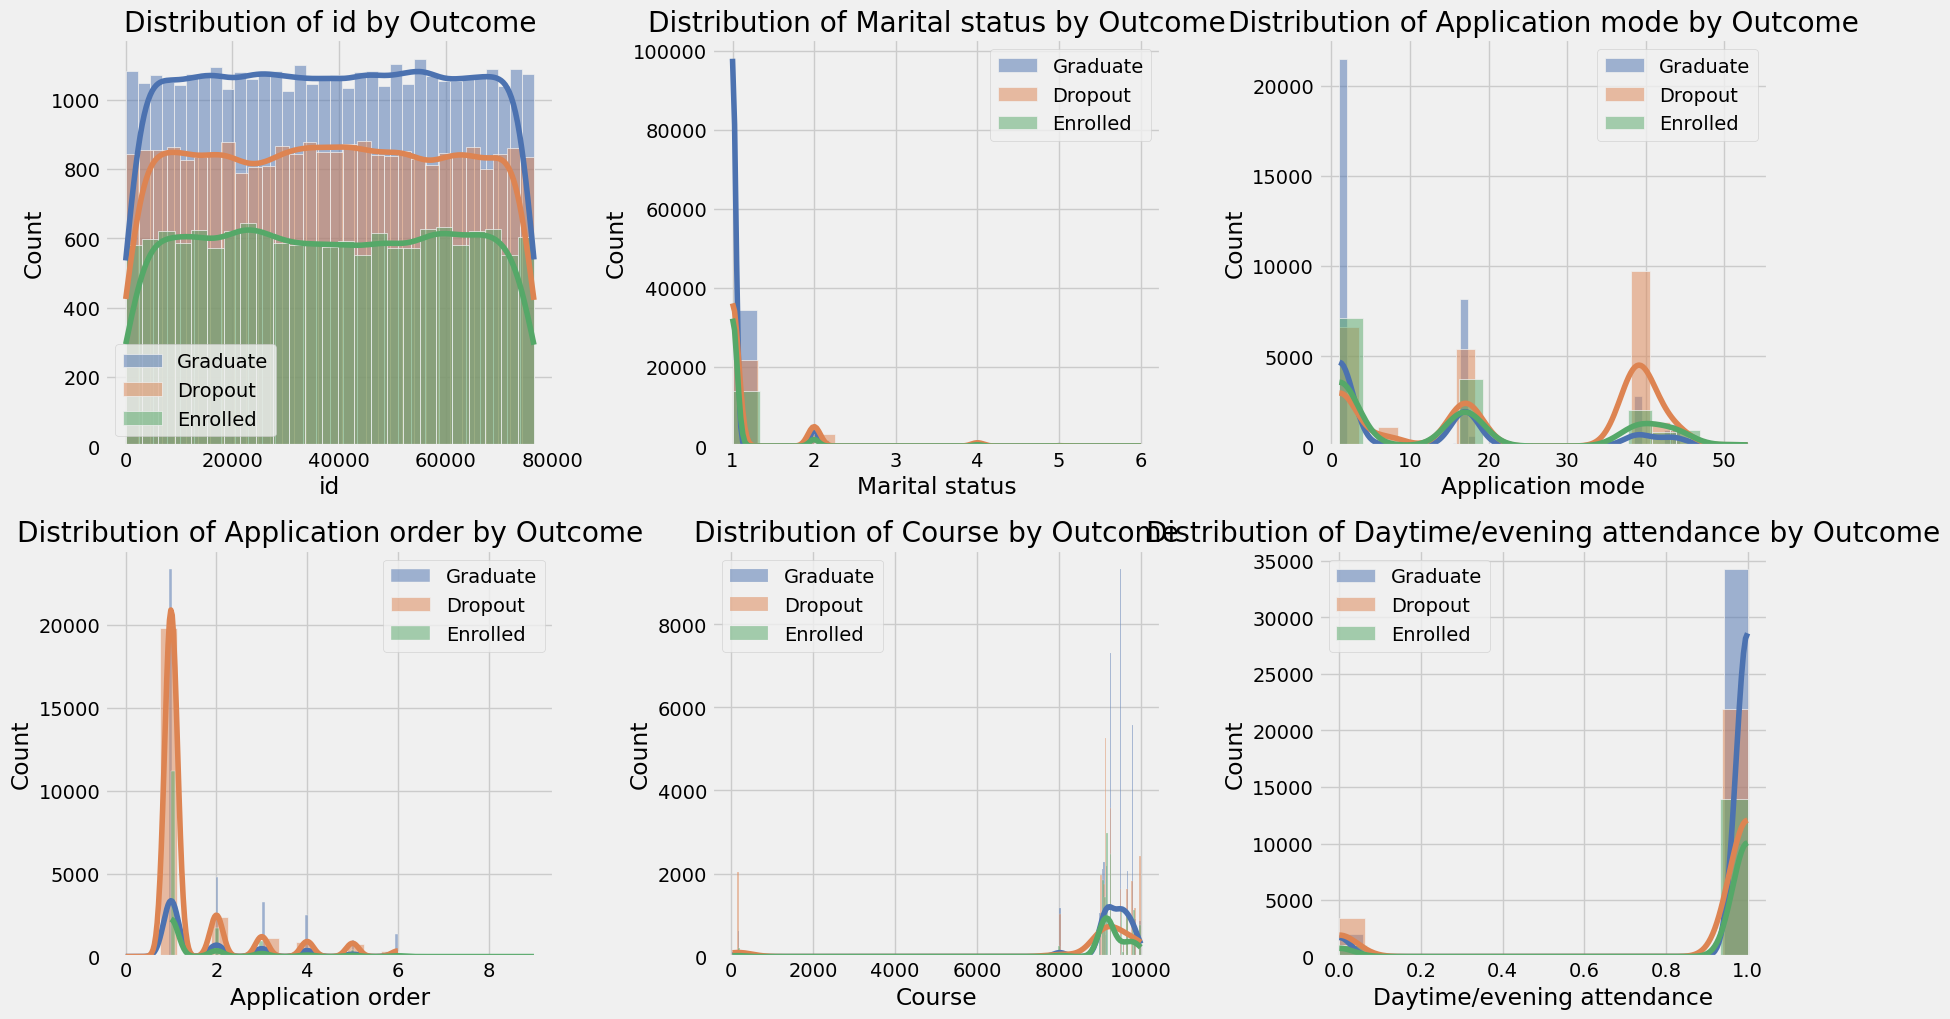

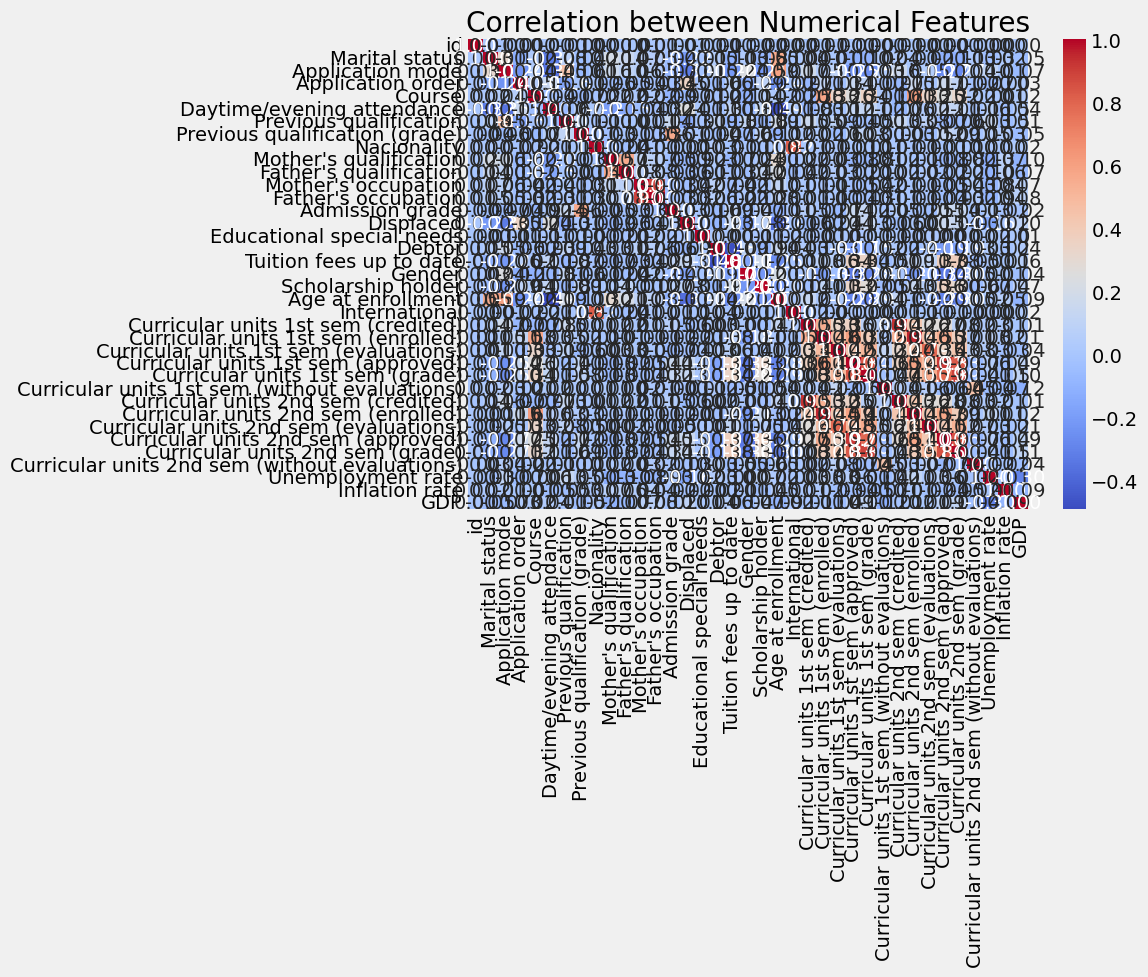

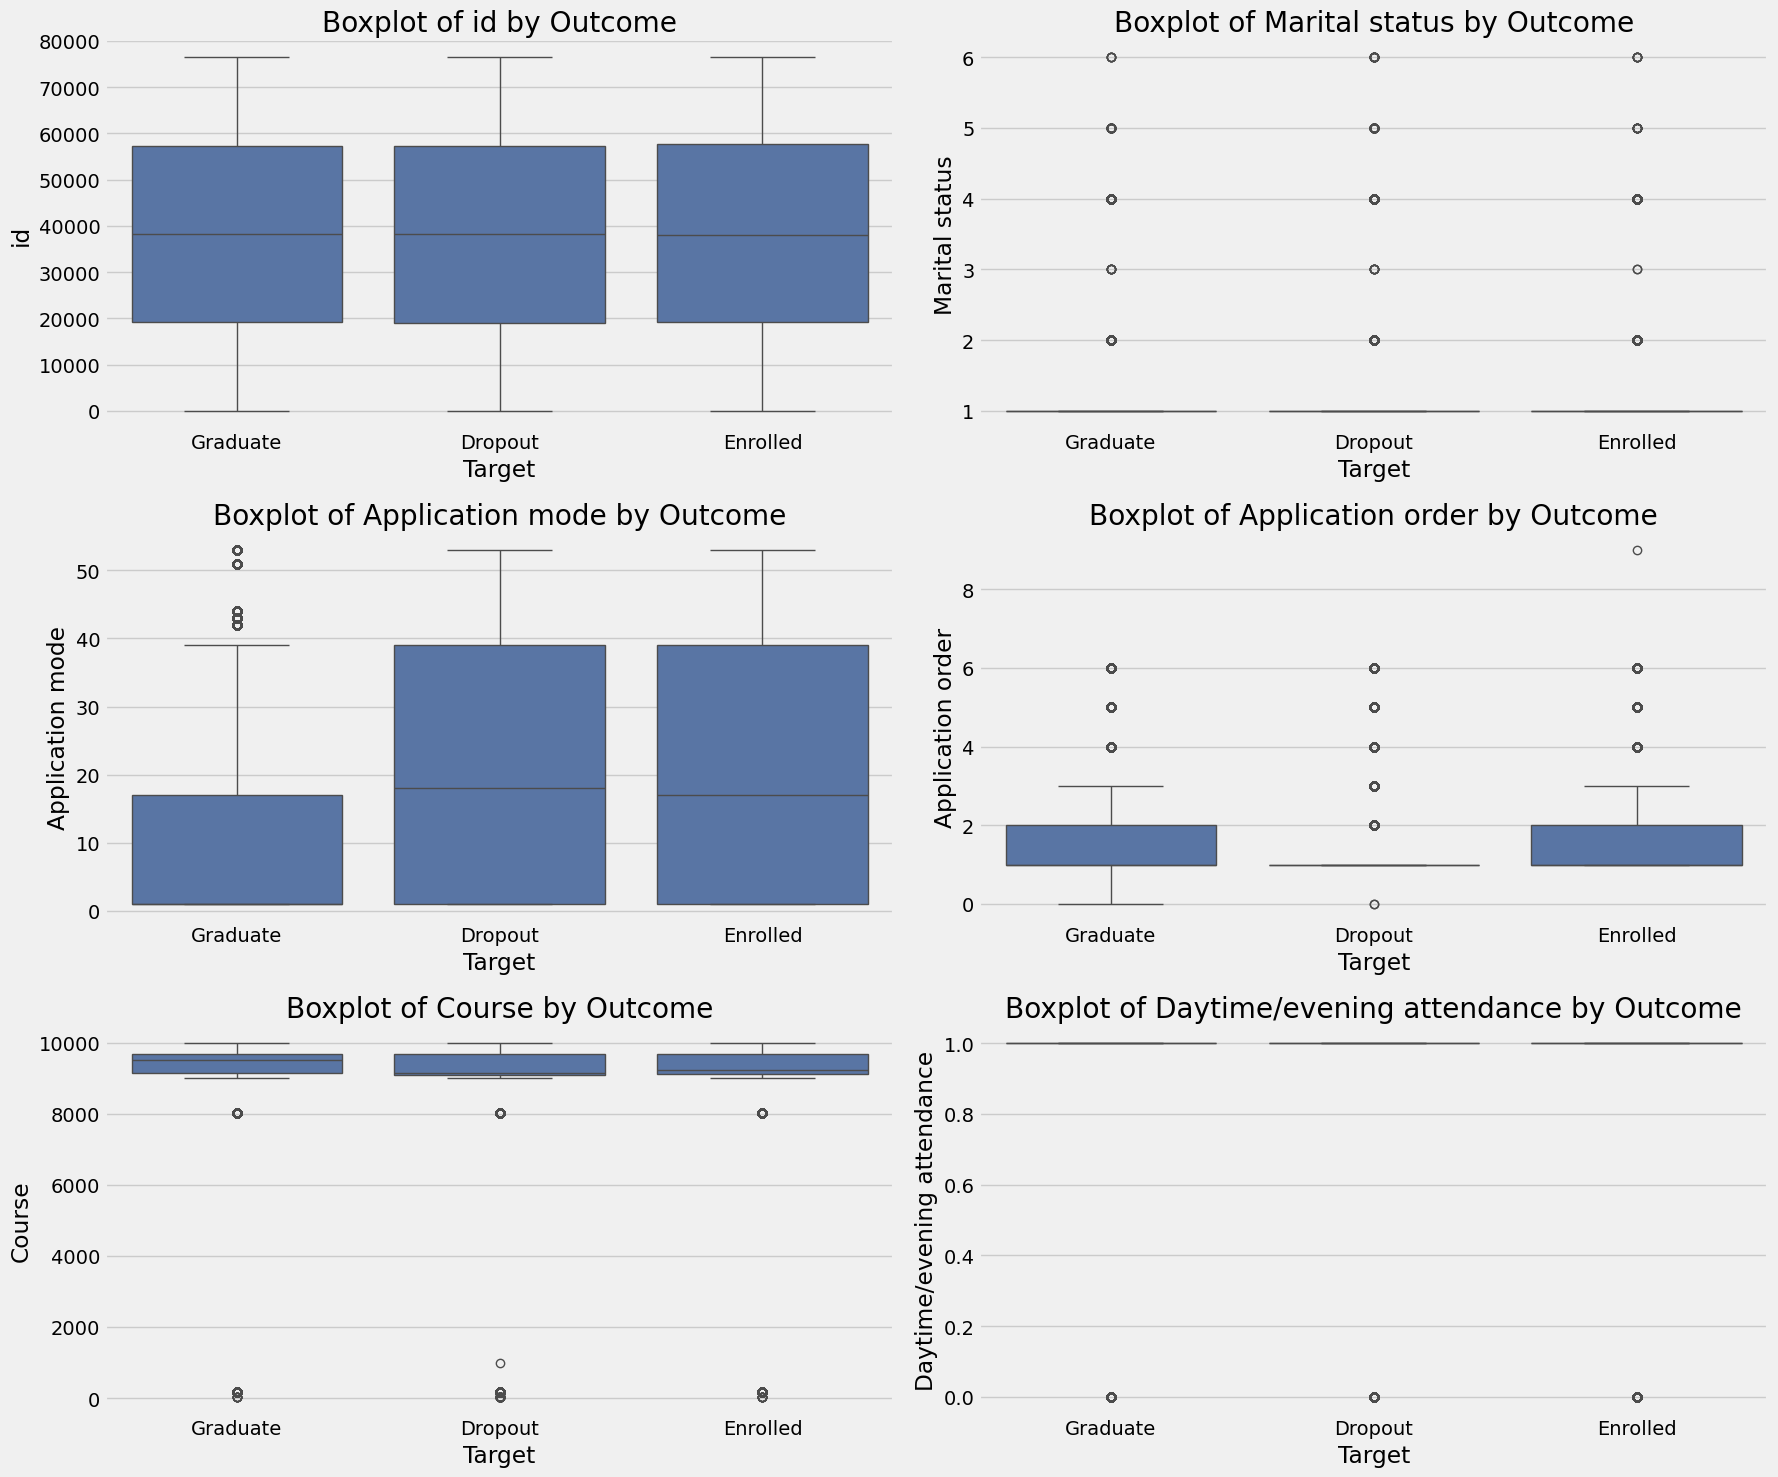

<Figure size 1500x500 with 0 Axes>

In [9]:
def plot_histograms(df, numerical_columns, target_column):
    plt.figure(figsize=(18, 15))
    for i, column in enumerate(numerical_columns):
        plt.subplot(3, 3, i+1)
        for outcome in df[target_column].unique():
            sns.histplot(df[df[target_column] == outcome][column], kde=True, label=outcome)
        plt.title(f'Distribution of {column} by Outcome')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_histograms(data, numerical_cols[:6], 'Target') 

plt.figure(figsize=(12, 10))
numeric_data = data[numerical_cols]
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 15))
for i, column in enumerate(numerical_cols[:6]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Target', y=column, data=data)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    ct = pd.crosstab(data[column], data['Target'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{column} vs Outcome')
    plt.xlabel(column)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

## 5. Feature Engineering

Let's create new features that might help improve our model's performance.

In [14]:

data_fe = data.copy()

# Example: Create a feature for total curricular units
if 'curricular_units_1st_sem' in data_fe.columns and 'curricular_units_2nd_sem' in data_fe.columns:
    data_fe['total_curricular_units'] = data_fe['curricular_units_1st_sem'] + data_fe['curricular_units_2nd_sem']

# Example: Create performance ratio if we have grades
if 'admission_grade' in data_fe.columns and 'previous_qualifications' in data_fe.columns:
    data_fe['performance_ratio'] = data_fe['admission_grade'] / data_fe['previous_qualifications'].replace(0, 1)  # Avoid division by zero

# Example: Create feature interactions
if 'age' in data_fe.columns and 'attendance' in data_fe.columns:
    data_fe['age_attendance_interaction'] = data_fe['age'] * data_fe['attendance']

# Update X, y with engineered features
X_fe = data_fe.drop('Target', axis=1)
y_fe = data_fe['Target']

# Update categorical and numerical columns
categorical_cols_fe = X_fe.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_fe = X_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("New features created:")
for col in X_fe.columns:
    if col not in X.columns:
        print(f"- {col}")

# Feature importance using Random Forest
# This helps determine which features might be most useful for prediction
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)

# Create preprocessing pipeline for feature selection
feature_preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols_fe),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_fe)
    ])

# Apply transformations
X_fe_processed = feature_preprocessor.fit_transform(X_fe)

# Get feature names after one-hot encoding
categorical_features = feature_preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols_fe)
feature_names = numerical_cols_fe + list(categorical_features)

# Fit the model for feature importance
rf_feature_selector.fit(X_fe_processed, y_fe)

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(rf_feature_selector.feature_importances_)[-20:]  # Top 20 features
plt.barh(np.array(feature_names)[sorted_idx], rf_feature_selector.feature_importances_[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

# Update training and testing sets with engineered features
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42, stratify=y_fe)

New features created:


NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 6. Model Building

Let's build multiple classification models to predict student outcomes.

In [11]:
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

# Build and evaluate each model using cross-validation
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create full pipeline with preprocessing and model
    full_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(full_pipeline, X_train_fe, y_train_fe, cv=5, scoring='accuracy')
    
    # Train the model on the full training set
    full_pipeline.fit(X_train_fe, y_train_fe)
    
    # Make predictions on test data
    y_pred = full_pipeline.predict(X_test_fe)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test_fe, y_pred)
    precision = precision_score(y_test_fe, y_pred, average='weighted')
    recall = recall_score(y_test_fe, y_pred, average='weighted')
    f1 = f1_score(y_test_fe, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'cross_val_mean': cv_scores.mean(),
        'cross_val_std': cv_scores.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test_fe, y_pred),
        'pipeline': full_pipeline
    }
    
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Test precision: {precision:.4f}")
    print(f"Test recall: {recall:.4f}")
    print(f"Test F1 score: {f1:.4f}")

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Cross-Val Accuracy': [results[model]['cross_val_mean'] for model in results],
    'Test Accuracy': [results[model]['accuracy'] for model in results],
    'Test Precision': [results[model]['precision'] for model in results],
    'Test Recall': [results[model]['recall'] for model in results],
    'Test F1 Score': [results[model]['f1_score'] for model in results]
})

# Display the results
display(results_df.sort_values('Test F1 Score', ascending=False))


Training Logistic Regression...


NameError: name 'X_train_fe' is not defined

## 7. Model Evaluation

Let's compare the performance of all models using various metrics and visualizations.

In [10]:

plt.figure(figsize=(14, 8))

models_list = results_df['Model'].tolist()
x = np.arange(len(models_list))
width = 0.15

plt.bar(x - width*2, results_df['Cross-Val Accuracy'], width, label='Cross-Val Accuracy')
plt.bar(x - width, results_df['Test Accuracy'], width, label='Test Accuracy')
plt.bar(x, results_df['Test Precision'], width, label='Precision')
plt.bar(x + width, results_df['Test Recall'], width, label='Recall')
plt.bar(x + width*2, results_df['Test F1 Score'], width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models_list, rotation=45)
plt.legend()
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
for i, (name, model_results) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    cm = model_results['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test_fe),
                yticklabels=np.unique(y_test_fe))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

best_model_name = results_df.iloc[results_df['Test F1 Score'].argmax()]['Model']
best_model = results[best_model_name]['pipeline']
print(f"Best performing model based on F1 score: {best_model_name}")

# Get predicted probabilities for multi-class ROC curves
if len(np.unique(y_test_fe)) > 2: 
    # Get the predicted probabilities
    y_probs = best_model.predict_proba(X_test_fe)
    
    # One-vs-Rest (OvR) ROC Curves
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(best_model.classes_):
        # Get the probabilities for this class
        y_prob = y_probs[:, i]
        
        # Create binary labels for this class (one-vs-rest)
        y_test_bin = (y_test_fe == class_name).astype(int)
        
        # Calculate ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot
        plt.plot(fpr, tpr, lw=2, 
                 label=f'ROC curve for {class_name} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {best_model_name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

# Generate classification report
print(f"\nClassification Report for {best_model_name}:")
best_y_pred = best_model.predict(X_test_fe)
print(classification_report(y_test_fe, best_y_pred))

NameError: name 'results_df' is not defined

<Figure size 1400x800 with 0 Axes>

## 8. Hyperparameter Tuning

Let's fine-tune the best performing model to improve its performance further.